In [2]:
# 7.2 使用scikit-leran提供的隨機森林處理分類問題(RandomForestClassifier)(validation_curve)

In [5]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve # 驗證曲線:看不同數目的基學習器跟準確率的關係)
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()


train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

np.random.seed(123456)

In [11]:
# --- 第 2 部分 ---
# 初始化模型

ensemble_size = 500
ensemble = RandomForestClassifier(n_estimators=ensemble_size,  # 指定基學習器的數量
                                  n_jobs=4)                    # 決定平行程序的數目

param_range = [10, 50, 100, 150, 200, 250, 300, 350, 400]
train_scores, test_scores = validation_curve(
    ensemble,   # 模型
    train_x,    # 資料集的特徵
    train_y,    # 資料集的標籤
    param_name='n_estimators', # 欲調整的超參數
    param_range=param_range,   # 超參數的範圍
    cv = 10,                   # 交叉驗證的折數
    scoring = 'accuracy')      # 評價指標

In [12]:
# --- 第 3 部分 ---
# 計算準確率的平均數跟標準差
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

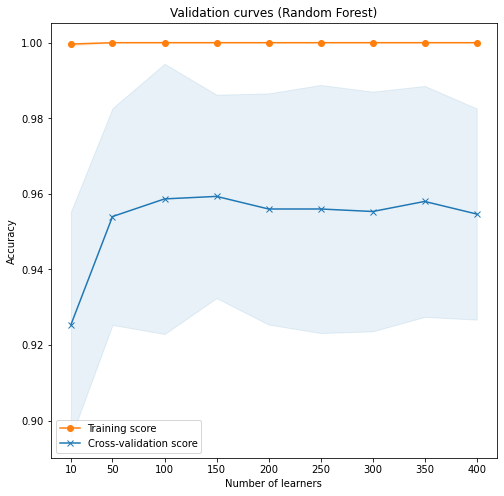

In [13]:
# --- 第 4 部分 ---
# 繪製徒刑
plt.figure(figsize = (8, 8))
plt.title('Validation curves (Random Forest)')
# 繪製標準差
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha = 0.1,
                 color = "C1")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha = 0.1, 
                 color = "C0")

# 繪製平均數
plt.plot(param_range, 
         train_scores_mean, 
         'o-', 
         color = "C1",
         label = "Training score")
plt.plot(param_range, 
         test_scores_mean, 
         'x-', 
         color = "C0",
         label = "Cross-validation score")

plt.xticks(param_range)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.legend(loc = "best")